In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
prototxtPath = os.path.sep.join([r'drive/My Drive/face_detector','deploy.prototxt'])
weightsPath = os.path.sep.join([r'drive/My Drive/face_detector','res10_300x300_ssd_iter_140000.caffemodel'])

In [ ]:
net = cv2.dnn.readNet(prototxtPath,weightsPath)

In [ ]:
model = load_model(r'drive/My Drive/face_mask_detection.h5')

In [ ]:
image = cv2.imread(r'drive/My Drive/testing_images/example_01.png')

In [ ]:
(h,w) = image.shape[:2]

In [ ]:
blob = cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))

In [ ]:
net.setInput(blob)
detections = net.forward()

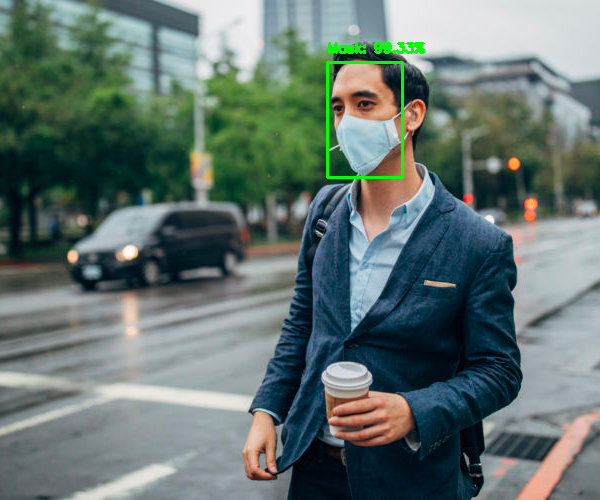

In [ ]:
for i in range(0,detections.shape[2]):

  confidence = detections[0,0,i,2]
  
  if confidence > 0.5:
    box = detections[0,0,i,3:7]*np.array([w,h,w,h])
    (startX,startY,endX,endY) = box.astype('int')

    (startX,startY) = (max(0,startX),max(0,startY))
    (endX,endY) = (min(w-1,endX),min(h-1,endY))

    face = image[startY:endY,startX:endX]
    face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
    face = cv2.resize(face,(224,224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face,axis=0)

    (mask,withoutMask) = model.predict(face)[0]

    label='Mask' if mask>withoutMask else 'No Mask'
    color = (0,255,0) if label == 'Mask'  else (0,0,255)

    label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)

    cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
    cv2.rectangle(image,(startX,startY),(endX,endY),color,2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()